# Importing Libraries

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

In [6]:
print(os.listdir("input"))

['sign_mnist_test.csv', 'sign_mnist_train.csv']


# Loading training and test data

In [7]:
sign_train = pd.read_csv("input/sign_mnist_train.csv")
sign_test = pd.read_csv("input/sign_mnist_test.csv")

In [8]:
#Getting the training and testing data and output
x_test = sign_test.iloc[:, 1:].values
y_test = sign_test.iloc[:, 0].values
x_train = sign_train.iloc[:, 1:].values
y_train = sign_train.iloc[:, 0].values

In [9]:
#Verify training and test data shape
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(27455, 784) (7172, 784) (27455,) (7172,)


# Showing sample data

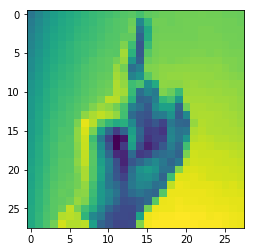

In [13]:
from PIL import Image

plt.imshow(x_train[0, :].reshape(28, 28).astype('uint8'))

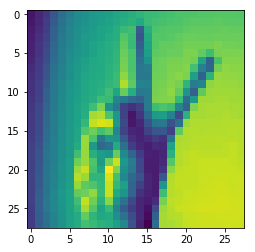

In [14]:
plt.imshow(x_test[5, :].reshape(28, 28).astype('uint8'))

# Data pre-processing

# Labling data

In [15]:
#OnceHotEncoding for y_train
from sklearn.preprocessing import OneHotEncoder
y_train= y_train.reshape(-1,1)
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train).toarray()

y_test= y_test.reshape(-1,1)
ohe = OneHotEncoder()
y_test = ohe.fit_transform(y_test).toarray()

In [16]:
#Verify training and test data shape
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(27455, 784) (7172, 784) (27455, 24) (7172, 24)


# Scaling data

In [17]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

C:\Users\dipak\Anaconda3\envs\Python2_class\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
#Verify training and test data shape
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(27455, 784) (7172, 784) (27455, 24) (7172, 24)


# Reshaping data into 28x28 image

In [19]:
#Reshaping the data to fit the original size of the image
x_train = np.reshape(x_train, (27455, 28, 28, 1))
x_test = np.reshape(x_test, (7172, 28, 28, 1))

In [20]:
#Verify training and test data shape
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(27455, 28, 28, 1) (7172, 28, 28, 1) (27455, 24) (7172, 24)


# Building model

In [ ]:
#Training the model now
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


classifier= Sequential()

#Add Convolutional layer
classifier.add(Convolution2D(16, 3,3, input_shape=(x_train.shape[1:]), activation='relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

classifier.add(Convolution2D(16, 3,3, input_shape=(x_train.shape[1:]), activation='relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))



#Flattening
classifier.add(Flatten())

#Adding Hiden Layers
classifier.add(Dense(units=128, activation="relu"))
classifier.add(Dense(units=24, activation="sigmoid"))

#Compiling the model
classifier.compile(optimizer="adam", loss="categorical_crossentropy", 
                   metrics=["accuracy"])


# Model Summary

In [ ]:
classifier.summary()

# Training Model

In [ ]:
#Now training the model
classifier.fit(x_train, y_train, batch_size = 10, epochs = 2, validation_split=0.2)

In [ ]:
score2 = classifier.evaluate(x_test, y_test)
print()
print('Test accuracy: ', score2[1])

In [ ]:
classifier.save("sign_test_model1.h5", overwrite=True)

# Load Model

In [22]:
from keras.models import load_model
import keras.backend as K


loaded_model = load_model("sign_test_model1.h5")

# Visualize Weights

In [23]:
for l in loaded_model.layers:
    if l.name == 'conv2d_2':
        weights, biases = l.get_weights()
        print (weights.shape, biases.shape)
        activations = l.output
        print (activations)

(3, 3, 16, 16) (16,)
Tensor("conv2d_2_1/Relu:0", shape=(?, 11, 11, 16), dtype=float32)


In [44]:
get_layer_output = K.function([loaded_model.layers[0].input], [loaded_model.layers[3].output])

C:\Users\dipak\Anaconda3\envs\Python2_class\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


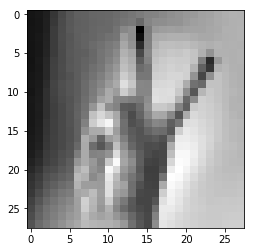

In [45]:
sample_num = 5

activations = get_layer_output([[x_test[sample_num]]])[0]
plt.grid('off')
plt.imshow(x_test[sample_num].reshape(28,28), cmap='gray')

In [46]:
activations.shape

(1, 5, 5, 16)

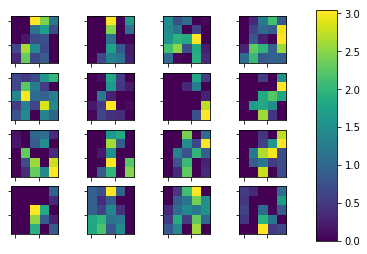

In [47]:
fig, axes = plt.subplots(nrows=4, ncols=4)
for i, ax in enumerate(axes.flat):
    if i < activations.shape[3]:
        im = ax.imshow(activations[:,:,:,i].reshape(activations.shape[1], activations.shape[2]))
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.grid(False)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cbar_ax)



In [48]:
layer_names = []
for layer in loaded_model.layers[:4]:
    layer_names.append(layer.name)
    print (layer.name)
images_per_row = 8
for layer_name, layer_activation in zip(layer_names, activations):
    print(layer_activation.shape)

conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
(5, 5, 16)


In [33]:
from keras.preprocessing import image 
import numpy as np
img =  x_test[sample_num]
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.
print(img_tensor.shape)

(1, 28, 28, 1)


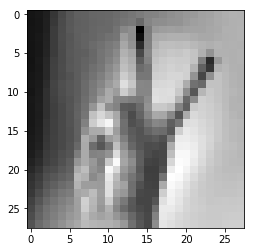

In [35]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0].reshape(28,28), cmap='gray')
plt.show()

In [36]:
from keras import models
layer_outputs = [layer.output for layer in loaded_model.layers[:4]]
activation_model = models.Model(inputs=loaded_model.input, outputs=layer_outputs)

In [37]:
activation_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
Total params: 2,480
Trainable params: 2,480
Non-trainable params: 0
_________________________________________________________________


In [38]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 16)


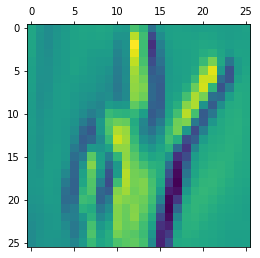

In [39]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()

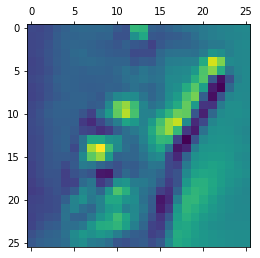

In [40]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')
plt.show()

C:\Users\dipak\Anaconda3\envs\Python2_class\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


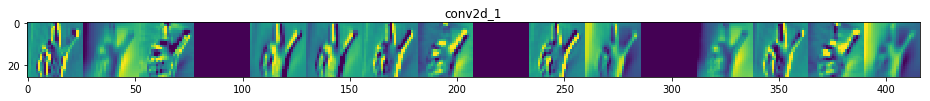

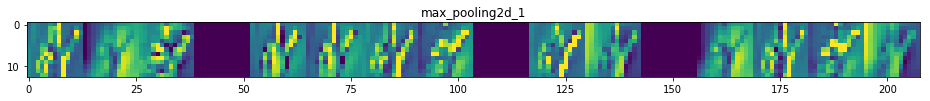

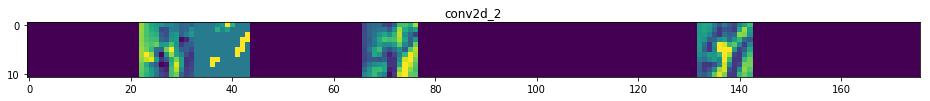

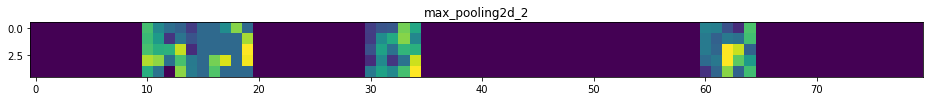

In [41]:
layer_names = []
for layer in loaded_model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Prediction on Model

In [51]:
#Predicting the data with test input
y_pred = loaded_model.predict(x_test)
y_pred = (y_pred > 0.5)

# Displaying Model accuracy

In [52]:
#Finding the accuracy of model
count = 0
for i in range(0, y_pred.shape[0]):
    for j in range(0, y_pred.shape[1]):
        if y_pred[i][j] == y_test[i][j]:
            count = count+1
        else:
            continue    
#print(count) 
print("Accurancy: "+str(count/(7172*24)))

Accurancy: 0.9678495073433724


# Predicting sign using single image

In [217]:
from keras.preprocessing import image 
import numpy as np
test_img_path = 'image.jpg'
test_img = image.load_img(img_path, target_size=(28, 28))
test_img_tensor = image.img_to_array(test_img)
test_img_tensor = np.expand_dims(test_img_tensor, axis=0) 
print(test_img_tensor.shape)

(1, 28, 28, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


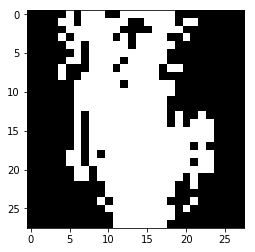

In [218]:
plt.imshow(test_img_tensor.reshape(28,28,3), cmap='gray')

# Converting 3d array into 1d

In [219]:
test_img_tensor = test_img_tensor.reshape(1,-1)

In [220]:
print(test_img_tensor.shape)

(1, 2352)


# Taking only first channel of image(784 pixels)

In [221]:
test_img_tensor = test_img_tensor[0,:784]

In [222]:
print(test_img_tensor.shape)

(784,)


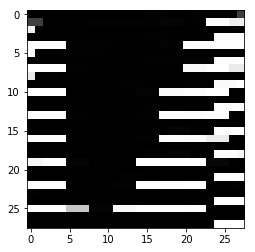

In [223]:
plt.imshow(test_img_tensor.reshape(28,28), cmap='gray')

# Reshaping it into 28x28

In [224]:
test_img_tensor = np.reshape(test_img_tensor, (1,28, 28, 1))

In [225]:
print(test_img_tensor.shape)

(1, 28, 28, 1)


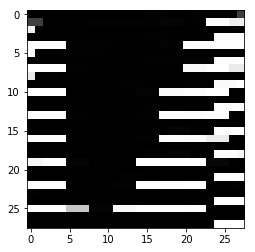

In [226]:
plt.imshow(test_img_tensor.reshape(28,28), cmap='gray')

# Predicting sign

In [227]:
preds = loaded_model.predict(test_img_tensor)


In [228]:
preds.shape

(1, 24)

In [229]:
preds

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)